## Homework: 03

### ML Zoomcamp - Classification

### Data preparation

> Dataset: wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/course_lead_scoring.csv

* Check if the missing values are presented in the features.
* If there are missing values:
* For categorical features, replace them with 'NA'
* For numerical features, replace with with 0.0

In [2]:
# Import required modules.
import numpy as np
import pandas as pd
import seaborn as sns
# from zipfile import ZipFile
import matplotlib.pyplot as plt
# from sklearn.feature_extraction import DictVectorizer
# from sklearn.linear_model import LogisticRegression
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import mutual_info_score, accuracy_score
%matplotlib inline

In [3]:
# Define the data source and download location.
url = 'https://raw.githubusercontent.com/alexeygrigorev/datasets/master/course_lead_scoring.csv'

In [6]:
df = pd.read_csv(url)

In [7]:
df.head(5)

,lead_source,industry,number_of_courses_viewed,annual_income,employment_status,location,interaction_count,lead_score,converted
0,paid_ads,NaN,1,79450.0,unemployed,south_america,4,0.94,1
1,social_media,retail,1,46992.0,employed,south_america,1,0.80,0
2,events,healthcare,5,78796.0,unemployed,australia,3,0.69,1
3,paid_ads,retail,2,83843.0,NaN,australia,1,0.87,0
4,referral,education,3,85012.0,self_employed,europe,3,0.62,1


In [8]:
df.shape

(1462, 9)

In [9]:
# Show the info of df_in.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   lead_source               1334 non-null   object 
 1   industry                  1328 non-null   object 
 2   number_of_courses_viewed  1462 non-null   int64  
 3   annual_income             1281 non-null   float64
 4   employment_status         1362 non-null   object 
 5   location                  1399 non-null   object 
 6   interaction_count         1462 non-null   int64  
 7   lead_score                1462 non-null   float64
 8   converted                 1462 non-null   int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 102.9+ KB


In [10]:
# Check for missing values in df_in.
df.isna().sum()

lead_source                 128
industry                    134
number_of_courses_viewed      0
annual_income               181
employment_status           100
location                     63
interaction_count             0
lead_score                    0
converted                     0
dtype: int64

In [11]:
# # Subset the dataset.
# col_use = ['annual_income', 'lead_score'] 

# df = df[col_use]

In [11]:
#Identify categorical and numerical columns
categorical_features = ['lead_source', 'industry', 'employment_status', 'location']
numerical_features = [ 'annual_income']

# Fill missing values
df[categorical_features] = df[categorical_features].fillna('NA')
df[numerical_features] = df[numerical_features].fillna(0.0)

In [12]:
# Step 3: Verify there are no more missing values
print(df.isnull().sum())

lead_source                 0
industry                    0
number_of_courses_viewed    0
annual_income               0
employment_status           0
location                    0
interaction_count           0
lead_score                  0
converted                   0
dtype: int64


### Question 1

What is the most frequent observation (mode) for the column `industry`?

* NA
* technology
* healthcare
* retail

In [14]:
# Find the mode for column 'industry'.
print(df['industry'].mode())

0    retail
Name: industry, dtype: object


#### Question 01 Answer: `retail`

### Question 2

Create the [correlation matrix](https://www.google.com/search?q=correlation+matrix) for the numerical features of your dataset. 
In a correlation matrix, you compute the correlation coefficient between every pair of features.

What are the two features that have the biggest correlation?

* `interaction_count` and `lead_score`
* `number_of_courses_viewed` and `lead_score`
* `number_of_courses_viewed` and `interaction_count`
* `annual_income` and `interaction_count`
Only consider the pairs above when answering this question.

In [15]:
# Select numerical data in df.
df_num = df.copy().select_dtypes(include='number')

In [16]:
# Show the statistics of df_num.
df_num.describe()

,number_of_courses_viewed,annual_income,interaction_count,lead_score,converted
count,1462.000000,1462.000000,1462.000000,1462.000000,1462.000000
mean,2.031464,52472.172367,2.976744,0.506108,0.619015
std,1.449717,24254.347030,1.681564,0.288465,0.485795
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,44097.250000,2.000000,0.262500,0.000000
50%,2.000000,57449.500000,3.000000,0.510000,1.000000
75%,3.000000,68241.000000,4.000000,0.750000,1.000000
max,9.000000,109899.000000,11.000000,1.000000,1.000000


In [17]:
# Show the correletions between all the columns.
df_num.corr()

,number_of_courses_viewed,annual_income,interaction_count,lead_score,converted
number_of_courses_viewed,1.000000,0.009770,-0.023565,-0.004879,0.435914
annual_income,0.009770,1.000000,0.027036,0.015610,0.053131
interaction_count,-0.023565,0.027036,1.000000,0.009888,0.374573
lead_score,-0.004879,0.015610,0.009888,1.000000,0.193673
converted,0.435914,0.053131,0.374573,0.193673,1.000000


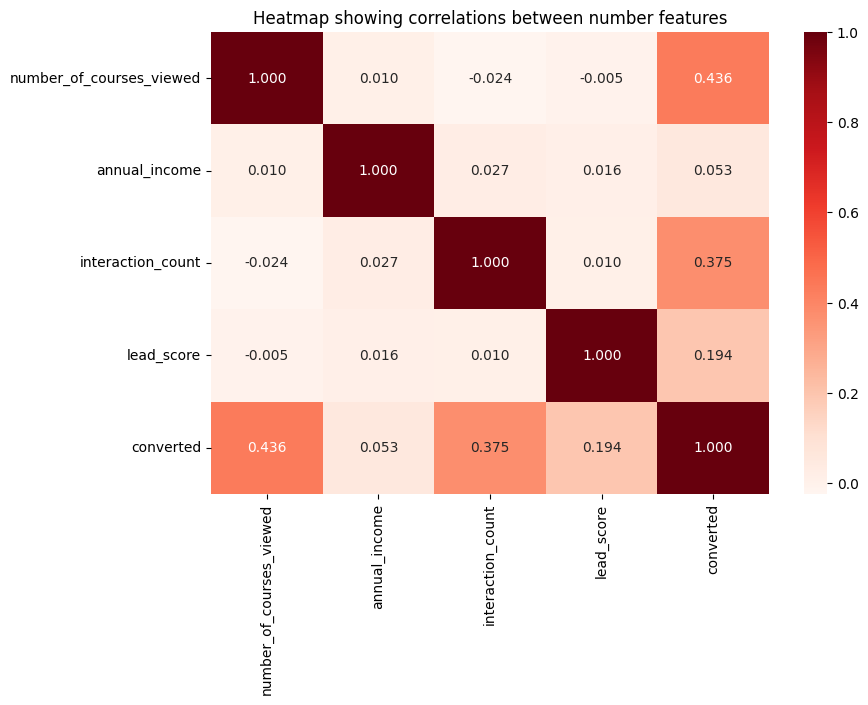

In [20]:
# Draw the heatmap of the correlations.
plt.figure(figsize=(9, 6))
sns.heatmap(df_num.corr(), cmap="Reds", annot=True, fmt='.3f')
plt.title('Heatmap showing correlations between number features')
plt.show();

In [21]:
# Unstack the correlation values.
df_unstack = df_num.corr().unstack().sort_values(ascending = False)
df_unstack

number_of_courses_viewed  number_of_courses_viewed    1.000000
annual_income             annual_income               1.000000
lead_score                lead_score                  1.000000
interaction_count         interaction_count           1.000000
converted                 converted                   1.000000
                          number_of_courses_viewed    0.435914
number_of_courses_viewed  converted                   0.435914
interaction_count         converted                   0.374573
converted                 interaction_count           0.374573
lead_score                converted                   0.193673
converted                 lead_score                  0.193673
annual_income             converted                   0.053131
converted                 annual_income               0.053131
annual_income             interaction_count           0.027036
interaction_count         annual_income               0.027036
annual_income             lead_score                  0

#### Question 02 Answer: `interaction_count and annual_income)`

### Target encoding

* Now we want to encode the `y` variable.
* Let's replace the values `yes`/`no` with `1`/`0`.

In [22]:
# # Replace the values `yes`/`no` with `1`/`0` in column that requires target encoding.
# df = df.copy()
# df['column'] = df['column'].map({'yes': 1, 'no': 0})

In [23]:
# # Show the head of df.
# df.head()

### Split the data

* Split your data in train/val/test sets with 60%/20%/20% distribution.
* Use Scikit-Learn for that (the train_test_split function) and set the seed to 42.
* Make sure that the target value converted is not in your dataframe.

In [24]:
# Split df into train/val/test sets with 60%/20%/20% distribution.
SEED = 42

df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=SEED)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=SEED)

assert len(df) == (len(df_train) + len(df_val) + len(df_test))

NameError: name 'train_test_split' is not defined

In [25]:
# Reset_index for y_train, y_val and y_test.
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [26]:
# Define y_train, y_val and y_test.
y_train = df_train.y.values
y_val = df_val.y.values
y_test = df_test.y.values

In [27]:
# Drop y from y_train, y_val and y_test.
df_train = df_train.drop('y', axis=1)
df_val = df_val.drop('y', axis=1)
df_test = df_test.drop('y', axis=1)

assert 'y' not in df_train.columns
assert 'y' not in df_val.columns
assert 'y' not in df_test.columns

### Question 3

* Calculate the mutual information score between `y` and other categorical variables in the dataset. Use the training set only.
* Round the scores to 2 decimals using `round(score, 2)`.

Which of these variables has the biggest mutual information score?
  
- `contact`
- `education`
- `housing`
- `poutcome`

In [28]:
# Define cal_mi function.
def cal_mi(series):
    return mutual_info_score(series, y_train)

In [29]:
# List the categorical columns.
df_cat = df_in.copy().select_dtypes(exclude='number').columns
df_cat

Index(['job', 'marital', 'education', 'housing', 'contact', 'month',
       'poutcome', 'y'],
      dtype='object')

In [30]:
# List the categorical columns.
cat_list = ['job', 'marital', 'education', 'housing', 'contact', 'month', 'poutcome']

In [31]:
# Calculate MI.
df_mi = df_train[cat_list].apply(cal_mi).round(2)
df_mi = df_mi.sort_values(ascending=False).to_frame(name='MI')
df_mi

,MI
poutcome,0.03
month,0.03
job,0.01
contact,0.01
housing,0.01
education,0.00
marital,0.00


#### Question 03 Answer: `poutcome`

### Question 4

* Now let's train a logistic regression.
* Remember that we have several categorical variables in the dataset. Include them using one-hot encoding.
* Fit the model on the training dataset.
    - To make sure the results are reproducible across different versions of Scikit-Learn, fit the model with these parameters:
    - `model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)`
* Calculate the accuracy on the validation dataset and round it to 2 decimal digits.

What accuracy did you get?

- 0.6
- 0.7
- 0.8
- 0.9

In [32]:
# Derive X_train.
dv = DictVectorizer(sparse=False)
train_dict = df_train.to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

In [33]:
# Fit X_train and y_train to model.
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

In [34]:
# Derive X_val.
val_dict = df_val.to_dict(orient='records')
X_val = dv.transform(val_dict)

In [35]:
# Obtain y_pred.
y_pred = model.predict(X_val)

In [36]:
# Calculate accuracy.
accuracy = np.round(accuracy_score(y_val, y_pred), 2)
print(f'Accuracy = {accuracy}')

Accuracy = 0.9


#### Question 04 Answer: `0.9`

### Question 5 

* Let's find the least useful feature using the *feature elimination* technique.
* Train a model with all these features (using the same parameters as in Q4).
* Now exclude each feature from this set and train a model without it. Record the accuracy for each model.
* For each feature, calculate the difference between the original accuracy and the accuracy without the feature. 

Which of following feature has the smallest difference?

- `age`
- `balance`
- `marital`
- `previous`

> **Note**: The difference doesn't have to be positive.

In [37]:
# List the featurea.
features = df_train.columns.to_list()
features

['age',
 'job',
 'marital',
 'education',
 'balance',
 'housing',
 'contact',
 'day',
 'month',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome']

In [38]:
# Apply the feature elimination technique.
original_score = accuracy
scores = pd.DataFrame(columns=['eliminated_feature', 'accuracy', 'difference'])
for feature in features:
    subset = features.copy()
    subset.remove(feature)
    
    dv = DictVectorizer(sparse=False)
    train_dict = df_train[subset].to_dict(orient='records')
    X_train = dv.fit_transform(train_dict)

    model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
    model.fit(X_train, y_train)
    
    val_dict = df_val[subset].to_dict(orient='records')
    X_val = dv.transform(val_dict)
    
    y_pred = model.predict(X_val)
    score = accuracy_score(y_val, y_pred)
    
    scores.loc[len(scores)] = [feature, score, original_score - score]

In [39]:
# Print the scores.
scores['difference'] = [abs(x) for x in scores['difference']]
scores

,eliminated_feature,accuracy,difference
0,age,0.901017,0.001017
1,job,0.901128,0.001128
2,marital,0.900243,0.000243
3,education,0.901017,0.001017
4,balance,0.900796,0.000796
5,housing,0.901017,0.001017
6,contact,0.900354,0.000354
7,day,0.901570,0.001570
8,month,0.899580,0.000420
9,duration,0.890069,0.009931


In [40]:
# Select the answer data.
ans_list = ['age', 'balance', 'marital', 'previous']
diff_val = [0.000796, 0.000796, 0.001128, 0.000575]

In [41]:
# Find the least useful feature.
min_diff = min(diff_val)
min_diff

0.000575

#### Question 05 Answer: `previous`

### Question 6

* Now let's train a regularized logistic regression.
* Let's try the following values of the parameter `C`: `[0.01, 0.1, 1, 10, 100]`.
* Train models using all the features as in Q4.
* Calculate the accuracy on the validation dataset and round it to 3 decimal digits.

Which of these `C` leads to the best accuracy on the validation set?

- 0.01
- 0.1
- 1
- 10
- 100

> **Note**: If there are multiple options, select the smallest `C`.

In [42]:
# Split df into train/val/test sets with 60%/20%/20% distribution.
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=SEED)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=SEED)

assert len(df) == (len(df_train) + len(df_val) + len(df_test))

In [43]:
# Reset_index for y_train, y_val and y_test.
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [44]:
# Define y_train, y_val and y_test.
y_train = df_train.y.values
y_val = df_val.y.values
y_test = df_test.y.values

In [45]:
# Drop y from y_train, y_val and y_test.
df_train = df_train.drop('y', axis=1)
df_val = df_val.drop('y', axis=1)
df_test = df_test.drop('y', axis=1)

assert 'y' not in df_train.columns
assert 'y' not in df_val.columns
assert 'y' not in df_test.columns

In [46]:
# Check the shapes of y_train and y_val.
y_train.shape, y_val.shape

((27126,), (9042,))

In [47]:
# Derive X_train.
train_dict = df_train.to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

In [48]:
# Derive X_val.
val_dict = df_val.to_dict(orient='records')
X_val = dv.transform(val_dict)

In [49]:
# Train and output results.
scores = {}
for alpha in [0.01, 0.1, 1, 10, 100]:
    model = LogisticRegression(solver='liblinear', C=alpha, max_iter=1000, random_state=42)
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_val)
    
    score = accuracy_score(y_val, y_pred)
    scores[alpha] = round(score, 3)
    print(f'alpha = {alpha}:\t RMSE = {score}')

alpha = 0.01:	 RMSE = 0.8986949789869498
alpha = 0.1:	 RMSE = 0.900464499004645
alpha = 1:	 RMSE = 0.9010174740101747
alpha = 10:	 RMSE = 0.9012386640123866
alpha = 100:	 RMSE = 0.9012386640123866


In [50]:
# Show the scores dictionary.
scores

{0.01: 0.899, 0.1: 0.9, 1: 0.901, 10: 0.901, 100: 0.901}

In [51]:
# Print the smallest alpha with best accuracy.
print(f'The smallest `alpha` with the best accuracy is {max(scores, key=scores.get)}.')

The smallest `alpha` with the best accuracy is 1.


#### Question 06 Answer: `0.1`